# Direct correlation between winter climate and summer LAI

Winter climate as:
- Solar radiation (ssrd) - 1981:2020
- Soil moisture (swvlall) - 1981:2020
- Temperature (t2m) - 1981:2020
- Precipitation (tp) - 1981:2020
- Summer LAI (lai) - 1982:2020
- Snow depth (sd) - 1981:2020
- Vapour Pressure Deficit (vpd) - 1981:2020

First step only has 2 months (no previous data), last step only has 1.

Using all from 1983 onwards.

## Get data

In [1]:
# Get data
import numpy as np
import pandas as pd
import netCDF4 as nc

path_data = 'F:\Work\Programming\Projects\DAMOCLES_TS_Project_3 [ongoing]\Data'

data_lai = nc.Dataset(path_data+'\\detrended_lai.nc')
lai = data_lai['GLOBMAP_LAI']
lat = data_lai['latitude']
lon = data_lai['longitude']

data_sd = nc.Dataset(path_data+'\\detrended_sd.nc')
sd = data_sd['sd']

data_ssrd = nc.Dataset(path_data+'\\detrended_ssrd.nc')
ssrd = data_ssrd['ssrd']

data_swvlall = nc.Dataset(path_data+'\\detrended_swvlall.nc')
swvlall = data_swvlall['swvlall']

data_t2m = nc.Dataset(path_data+'\\detrended_t2m.nc')
t2m = data_t2m['t2m']

data_tp = nc.Dataset(path_data+'\\detrended_tp.nc')
tp = data_tp['tp']

data_vpd = nc.Dataset(path_data+'\\detrended_vpd.nc')
vpd = data_vpd['vpd']

In [2]:
# All variables starting at 1983-12-01, and remove 2020-12-01
lai = lai[4:-1,:,:] 
sd = sd[8:-1,:,:]
ssrd = ssrd[8:-1,:,:]
swvlall = swvlall[8:-1,:,:]
t2m = t2m[8:-1,:,:]
tp = tp[8:-1,:,:]
vpd = vpd[8:-1,:,:]

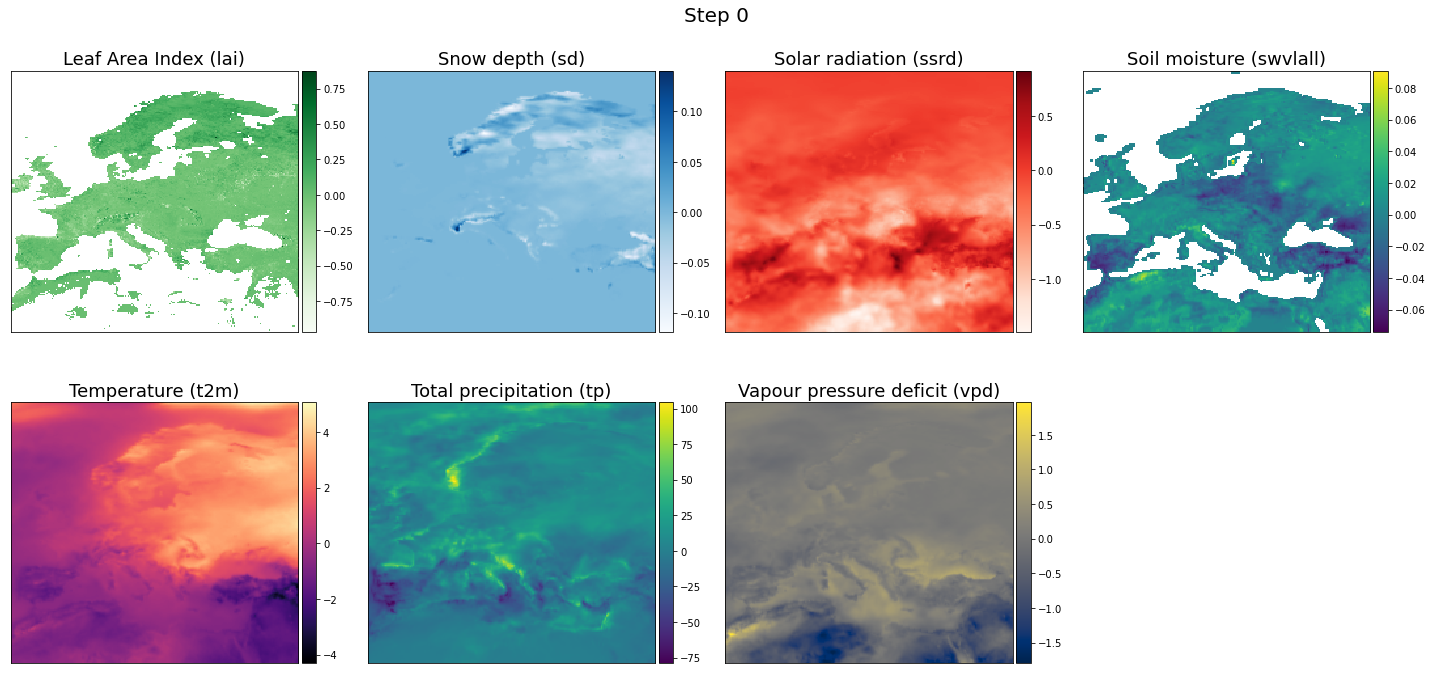

In [3]:
# Test plot
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# var_name = ['lai', 'sd', 'ssrd', 'swvlall', 't2m', 'tp', 'vpd']

fig, axes = plt.subplots(2,4, figsize=(20,10), facecolor='w', sharey=True)

im1 = axes[0,0].matshow(lai[0,:,:], cmap='Greens'); 
divider = make_axes_locatable(axes[0,0]); cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
axes[0,0].set_yticks([]); axes[0,0].set_xticks([])
axes[0,0].set_title('Leaf Area Index (lai)', size=18)

im2 = axes[0,1].matshow(sd[0,:,:], cmap='Blues'); 
divider = make_axes_locatable(axes[0,1]); cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
axes[0,1].set_yticks([]); axes[0,1].set_xticks([])
axes[0,1].set_title('Snow depth (sd)', size=18)

im3 = axes[0,2].matshow(ssrd[0,:,:], cmap='Reds'); 
divider = make_axes_locatable(axes[0,2]); cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')
axes[0,2].set_yticks([]); axes[0,2].set_xticks([])
axes[0,2].set_title('Solar radiation (ssrd)', size=18)

im4 = axes[0,3].matshow(swvlall[0,:,:]); 
divider = make_axes_locatable(axes[0,3]); cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical')
axes[0,3].set_yticks([]); axes[0,3].set_xticks([])
axes[0,3].set_title('Soil moisture (swvlall)', size=18)

im5 = axes[1,0].matshow(t2m[0,:,:], cmap='magma'); 
divider = make_axes_locatable(axes[1,0]); cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im5, cax=cax, orientation='vertical')
axes[1,0].set_yticks([]); axes[1,0].set_xticks([])
axes[1,0].set_title('Temperature (t2m)', size=18)

im6 = axes[1,1].matshow(tp[0,:,:], cmap='viridis'); 
divider = make_axes_locatable(axes[1,1]); cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im6, cax=cax, orientation='vertical')
axes[1,1].set_yticks([]); axes[1,1].set_xticks([])
axes[1,1].set_title('Total precipitation (tp)', size=18)

im7 = axes[1,2].matshow(vpd[0,:,:], cmap='cividis'); 
divider = make_axes_locatable(axes[1,2]); cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im7, cax=cax, orientation='vertical')
axes[1,2].set_yticks([]); axes[1,2].set_xticks([])
axes[1,2].set_title('Vapour pressure deficit (vpd)', size=18)

fig.delaxes(axes[1,3])
plt.suptitle('Step 0', y=0.98, size=20);
fig.tight_layout()

## Direct correlation

Specify variable and season.

Season:
- 0 for winter
- 1 for spring
- 2 for summer
- 3 for autumn

In [48]:
var = vpd
var_name = 'vpd'
season = 1
season_name = 'Spring'

In [49]:
# Direct correlation
from scipy import stats

aux_result_r = np.empty((lat.size,lon.size))
aux_result_r_check = np.empty((lat.size,lon.size))
aux_result_r_pval = np.empty((lat.size,lon.size))
aux_result_r_slope = np.empty((lat.size,lon.size))
aux_result_r_intercept = np.empty((lat.size,lon.size))
    
for i in np.arange(0, lat.size):
    for j in np.arange(0, lon.size):
        
        aux_predictor_pixel = var[:,i,j].data
        aux_lai_pixel = lai[:,i,j].data
        
        # Season predictor
        aux_predictor_pixel_season = aux_predictor_pixel[season::4]

        # Summer LAI
        aux_lai_pixel_summer = aux_lai_pixel[2::4]
        
        # Pearson
        if np.isnan(aux_lai_pixel_summer).sum() >= 1: # if it has any NaNs
            aux_result_r[i,j] = 0
            aux_result_r_pval[i,j] = 0
        else: 
            aux_pearson = stats.pearsonr(aux_predictor_pixel_season, aux_lai_pixel_summer)
            aux_linregress = stats.linregress(aux_predictor_pixel_season, aux_lai_pixel_summer)
            aux_result_r[i,j] = aux_pearson[0]
            aux_result_r_slope[i,j] = aux_linregress.slope
            aux_result_r_intercept[i,j] = aux_linregress.intercept
            aux_result_r_check[i,j] = aux_linregress.rvalue
            
            # pval mask
            if aux_pearson[1]>0.05:
                aux_result_r_pval[i,j] = 0
            else: aux_result_r_pval[i,j] = aux_pearson[0] 
            #del aux_pearson
        
        del aux_predictor_pixel_season, aux_lai_pixel_summer, aux_predictor_pixel, aux_lai_pixel

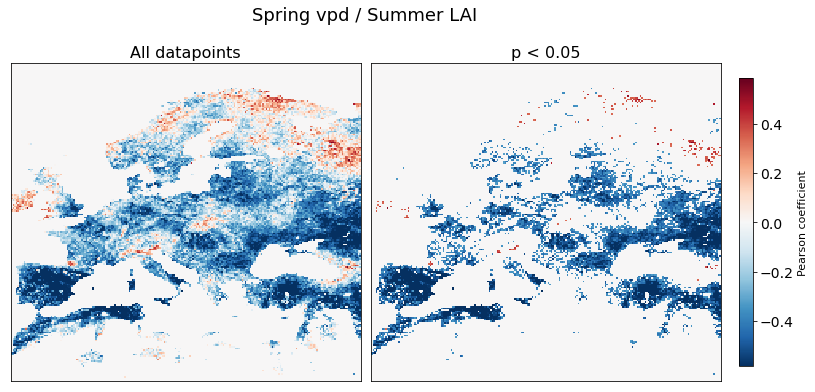

In [50]:
# Results for goodness of fit 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

max_val = np.nanmax(aux_result_r)

fig, ax = plt.subplots(1,2, figsize=(10,5), facecolor='w', constrained_layout = True)
im1 = ax[0].matshow(aux_result_r, cmap='RdBu_r', vmin=-max_val, vmax=max_val); 
ax[0].set_yticks([]); ax[0].set_xticks([])
ax[0].set_title('All datapoints', size=16)

im2 = ax[1].matshow(aux_result_r_pval, cmap='RdBu_r', vmin=-max_val, vmax=max_val); 
cbar_ax = fig.add_axes([1.02, 0.1, 0.02, 0.8])
cbar = plt.colorbar(im2, cax=cbar_ax); cbar.ax.tick_params(labelsize=14)
cbar.set_label('Pearson coefficient', size=11)
ax[1].set_yticks([]); ax[1].set_xticks([])
ax[1].set_title('p < 0.05', size=16)

fig.suptitle(season_name+' '+var_name+' / Summer LAI', y=1.1, size=18);

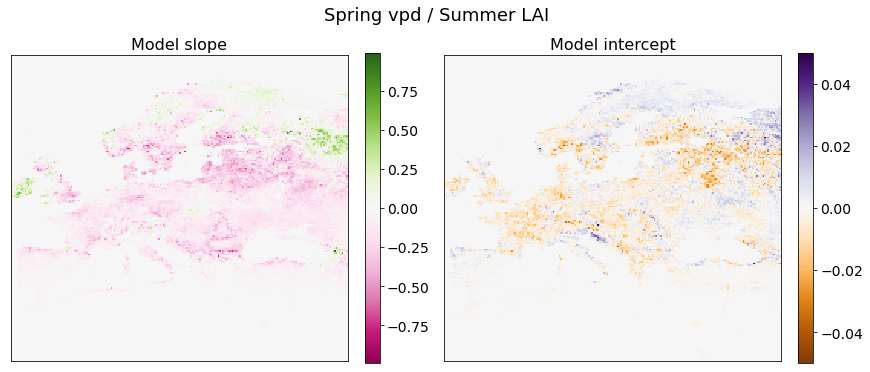

In [51]:
# Results for m and b
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

max_val_slope = np.nanmax(aux_result_r_slope)
max_val_intercept = np.nanmax(aux_result_r_intercept)

fig, ax = plt.subplots(1,2, figsize=(12,5), facecolor='w', constrained_layout = True)
im1 = ax[0].matshow(aux_result_r_slope, cmap='PiYG', vmin=-max_val_slope, vmax=max_val_slope);
cbar = plt.colorbar(im1, ax=ax[0], fraction=0.046); cbar.ax.tick_params(labelsize=14)
ax[0].set_yticks([]); ax[0].set_xticks([])
ax[0].set_title('Model slope', size=16)

im2 = ax[1].matshow(aux_result_r_intercept, cmap='PuOr', vmin=-max_val_intercept, vmax=max_val_intercept); 
cbar = plt.colorbar(im2, ax=ax[1], fraction=0.046); cbar.ax.tick_params(labelsize=14)
ax[1].set_yticks([]); ax[1].set_xticks([])
ax[1].set_title('Model intercept', size=16)

fig.suptitle(season_name+' '+var_name+' / Summer LAI', y=1.05, size=18);

### Lagged LAI

In [53]:
# Direct correlation
from scipy import stats

aux_result_r = np.empty((lat.size,lon.size))
aux_result_r_pval = np.empty((lat.size,lon.size))
aux_result_r_slope = np.empty((lat.size,lon.size))
aux_result_r_intercept = np.empty((lat.size,lon.size))

for i in np.arange(0, lat.size):
    for j in np.arange(0, lon.size):
        
        aux_lai_pixel = lai[:,i,j].data
        
        # Season predictor
        aux_lai_pixel_lagged = aux_lai_pixel[2:-3:4]

        # Summer LAI
        aux_lai_pixel_summer = aux_lai_pixel[6::4]
        
        # Pearson
        if np.isnan(aux_lai_pixel_summer).sum() >= 1: # if it has any NaNs
            aux_result_r[i,j] = 0
            aux_result_r_pval[i,j] = 0
        else: 
            aux_pearson = stats.pearsonr(aux_lai_pixel_lagged, aux_lai_pixel_summer)
            aux_linregress = stats.linregress(aux_lai_pixel_lagged, aux_lai_pixel_summer)
            aux_result_r[i,j] = aux_pearson[0]
            aux_result_r_slope[i,j] = aux_linregress.slope
            aux_result_r_intercept[i,j] = aux_linregress.intercept
            aux_result_r_check[i,j] = aux_linregress.rvalue
            # pval mask
            if aux_pearson[1]>0.05:
                aux_result_r_pval[i,j] = 0
            else: aux_result_r_pval[i,j] = aux_pearson[0] 
            del aux_pearson
        
        del aux_lai_pixel_lagged, aux_lai_pixel_summer, aux_lai_pixel

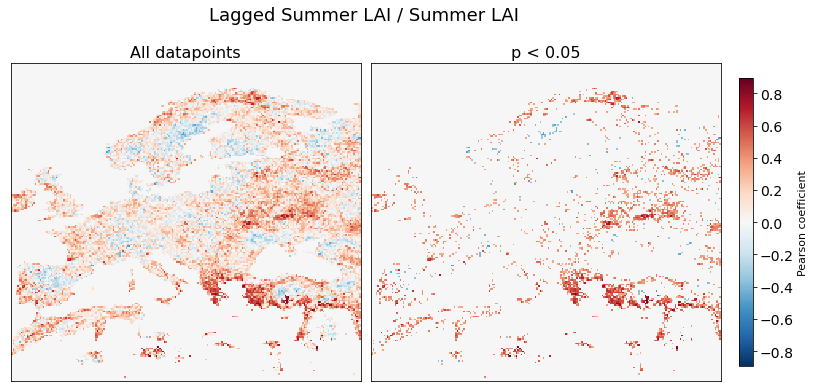

In [54]:
# Results
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

max_val = np.nanmax(aux_result_r)

fig, ax = plt.subplots(1,2, figsize=(10,5), facecolor='w', constrained_layout = True)
im1 = ax[0].matshow(aux_result_r, cmap='RdBu_r', vmin=-max_val, vmax=max_val); 
ax[0].set_yticks([]); ax[0].set_xticks([])
ax[0].set_title('All datapoints', size=16)

im2 = ax[1].matshow(aux_result_r_pval, cmap='RdBu_r', vmin=-max_val, vmax=max_val); 
cbar_ax = fig.add_axes([1.02, 0.1, 0.02, 0.8])
cbar = plt.colorbar(im2, cax=cbar_ax); cbar.ax.tick_params(labelsize=14)
cbar.set_label('Pearson coefficient', size=11)
ax[1].set_yticks([]); ax[1].set_xticks([])
ax[1].set_title('p < 0.05', size=16)

fig.suptitle('Lagged Summer LAI / Summer LAI', y=1.1, size=18);

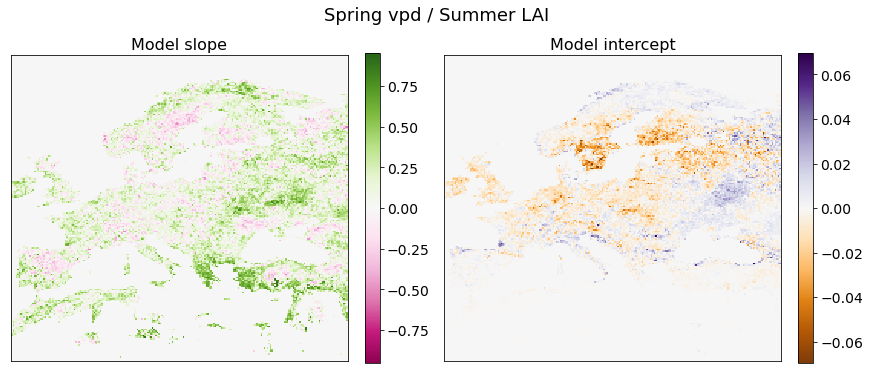

In [55]:
# Results for m and b
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

max_val_slope = np.nanmax(aux_result_r_slope)
max_val_intercept = np.nanmax(aux_result_r_intercept)

fig, ax = plt.subplots(1,2, figsize=(12,5), facecolor='w', constrained_layout = True)
im1 = ax[0].matshow(aux_result_r_slope, cmap='PiYG', vmin=-max_val_slope, vmax=max_val_slope);
cbar = plt.colorbar(im1, ax=ax[0], fraction=0.046); cbar.ax.tick_params(labelsize=14)
ax[0].set_yticks([]); ax[0].set_xticks([])
ax[0].set_title('Model slope', size=16)

im2 = ax[1].matshow(aux_result_r_intercept, cmap='PuOr', vmin=-max_val_intercept, vmax=max_val_intercept); 
cbar = plt.colorbar(im2, ax=ax[1], fraction=0.046); cbar.ax.tick_params(labelsize=14)
ax[1].set_yticks([]); ax[1].set_xticks([])
ax[1].set_title('Model intercept', size=16)

fig.suptitle(season_name+' '+var_name+' / Summer LAI', y=1.05, size=18);